In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [3]:
!ls

 20221220_124340.mp4		 'https___www.iemcrp.com_iemEn_BillDupDisplay_Stud(1).PDF'
 20221220_180723.mp4		 'income(1).csv'
 aiml_lab			 'lab_aiml (1).gsheet'
 classification_MLP_final.ipynb   lab_aiml.gsheet
 Classroom			 'SC Lab'
'Colab Notebooks'		 'Untitled document.gdoc'
'Getting started.pdf'


In [4]:
income_data=pd.read_csv("income(1).csv",na_values=["Null"])
data1=income_data.copy(deep=True)

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [6]:
data1.head(5)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [7]:
data1.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [8]:
data1.describe(include='O')

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


<Axes: xlabel='age', ylabel='hoursperweek'>

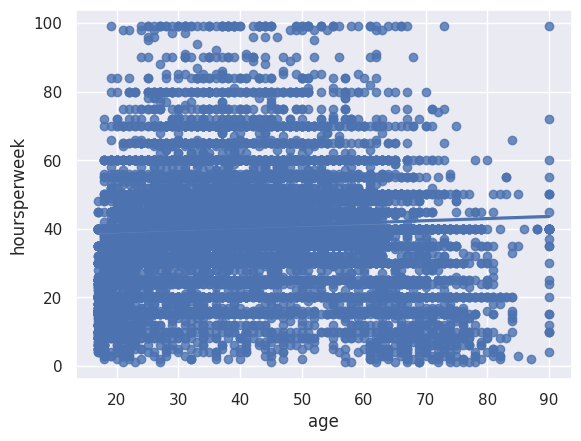

In [9]:
sns.set(style="darkgrid")
sns.regplot(x=data1['age'],y=data1['hoursperweek'],fit_reg=True)

In [10]:
data1['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [11]:
data1['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
print(np.unique(data1['JobType']))
print(np.unique(data1['occupation']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [13]:
income_data=pd.read_csv("income(1).csv",na_values=[' ?'])
data1=income_data.copy()

In [14]:
data1.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [15]:
null_data=data1[data1.isnull().any(axis=1)]
print(null_data)

       age JobType         EdType        maritalstatus occupation  \
8       17     NaN           11th        Never-married        NaN   
17      32     NaN   Some-college   Married-civ-spouse        NaN   
29      22     NaN   Some-college        Never-married        NaN   
42      52     NaN           12th        Never-married        NaN   
44      63     NaN        1st-4th   Married-civ-spouse        NaN   
...    ...     ...            ...                  ...        ...   
31892   59     NaN      Bachelors   Married-civ-spouse        NaN   
31934   20     NaN        HS-grad        Never-married        NaN   
31945   28     NaN   Some-college   Married-civ-spouse        NaN   
31967   80     NaN        HS-grad              Widowed        NaN   
31968   17     NaN           11th        Never-married        NaN   

          relationship    race   gender  capitalgain  capitalloss  \
8            Own-child   White   Female            0            0   
17             Husband   White   

In [16]:
data2=data1.dropna(axis=0)
print(data2)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

In [17]:
data2.corr()

<ipython-input-17-41dc7ecd48ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.corr()


,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [18]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [19]:
gender=pd.crosstab(index=data2['gender'],columns='count',normalize=True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [20]:
gender_salstat=pd.crosstab(index=data2['gender'],columns=data2['SalStat'],normalize='index',margins=True)
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


<Axes: xlabel='count', ylabel='SalStat'>

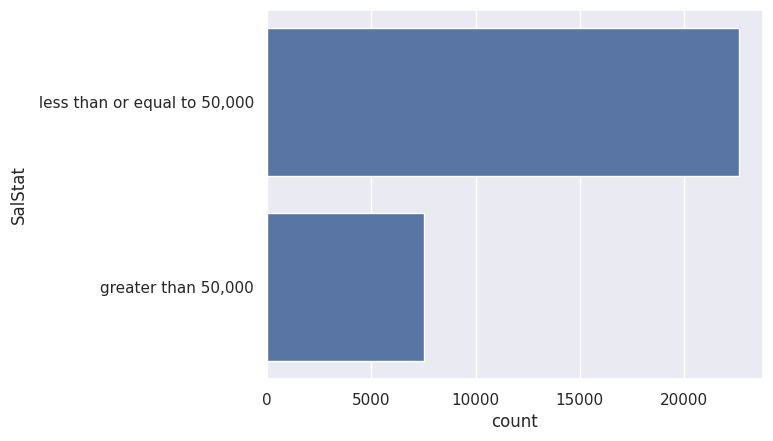

In [21]:
sns.countplot(data2['SalStat'])

<ipython-input-22-ce46e702c8a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['age'],bins=6,kde=False)


<Axes: xlabel='age'>

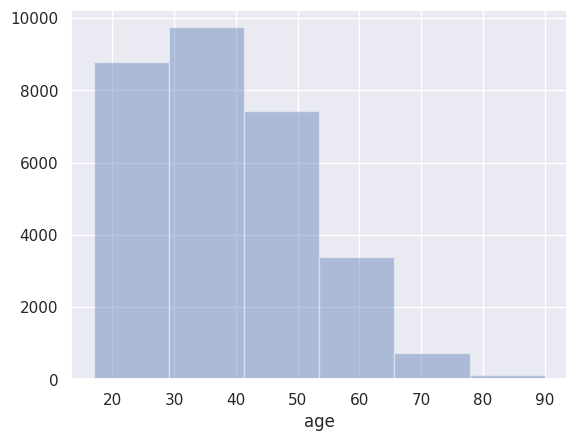

In [22]:
sns.distplot(data2['age'],bins=6,kde=False)

In [23]:
data2.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

In [24]:
data2.groupby('SalStat')['JobType'].value_counts()

SalStat                        JobType          
 greater than 50,000            Private              4876
                                Self-emp-not-inc      714
                                Local-gov             609
                                Self-emp-inc          600
                                Federal-gov           365
                                State-gov             344
 less than or equal to 50,000   Private             17410
                                Self-emp-not-inc     1785
                                Local-gov            1458
                                State-gov             935
                                Federal-gov           578
                                Self-emp-inc          474
                                Without-pay            14
Name: JobType, dtype: int64

In [25]:
data2['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: JobType, dtype: int64

In [26]:
jobtypes=['Private','Private','Self-emp-not-inc','Self-emp-not-inc','Local-gov','Local-gov','State-gov','State-gov','Self-emp-inc','Self-emp-inc','Federal-gov','Federal-gov','Without-pay','Without-pay']
counts=[4876,17410,714,1785,609,1458,600,935,365,578,344,474,0,14]
colours=['red','cyan','red','cyan','red','cyan','red','cyan','red','cyan','red','cyan','red','cyan']
index=np.arange(len(jobtypes))

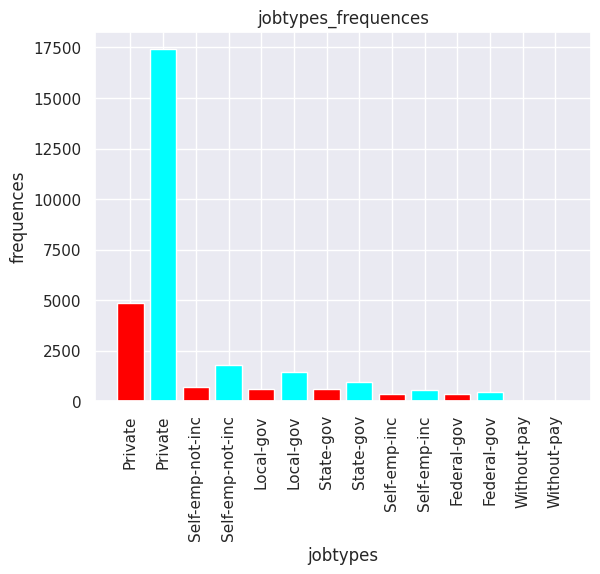

In [27]:
import matplotlib.pyplot as plt
plt.bar(index,counts,color=colours)
plt.xlabel('jobtypes')
plt.ylabel('frequences')
plt.title('jobtypes_frequences')
plt.xticks(index,jobtypes,rotation=90)
plt.show()

<Axes: xlabel='count', ylabel='JobType'>

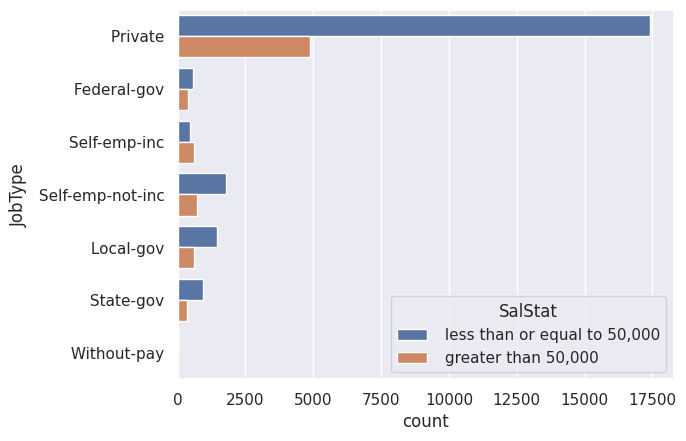

In [28]:
sns.countplot(y='JobType',data=data2,hue='SalStat')

In [29]:
pd.crosstab(index=data2['JobType'],columns=data2['SalStat'],normalize='index',margins=True)

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,0.387063,0.612937
Local-gov,0.294630,0.705370
Private,0.218792,0.781208
Self-emp-inc,0.558659,0.441341
Self-emp-not-inc,0.285714,0.714286
State-gov,0.268960,0.731040
Without-pay,0.000000,1.000000
All,0.248922,0.751078


<Axes: xlabel='count', ylabel='EdType'>

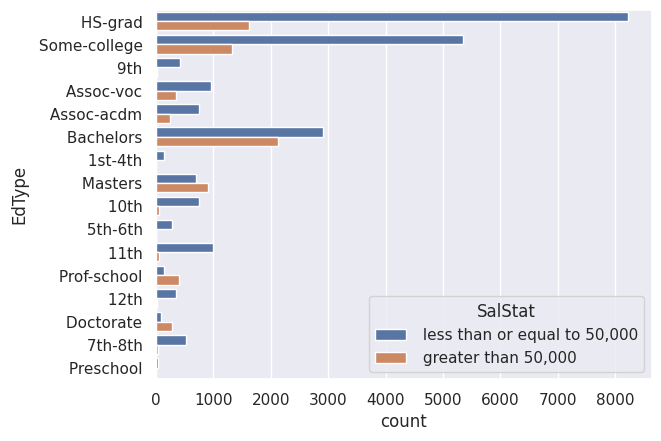

In [30]:
sns.countplot(y='EdType',data=data2,hue='SalStat')

In [31]:
pd.crosstab(index=data2['EdType'],columns=data2['SalStat'],normalize='index',margins=True)

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,0.071951,0.928049
11th,0.056298,0.943702
12th,0.076923,0.923077
1st-4th,0.039735,0.960265
5th-6th,0.041667,0.958333
7th-8th,0.062837,0.937163
9th,0.054945,0.945055
Assoc-acdm,0.253968,0.746032
Assoc-voc,0.263198,0.736802


<Axes: xlabel='count', ylabel='occupation'>

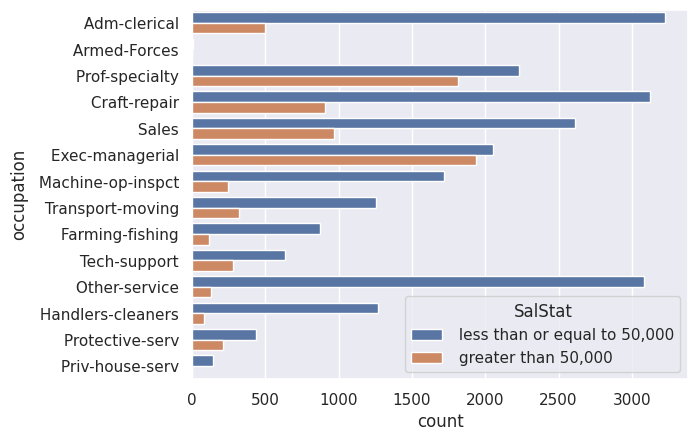

In [32]:
sns.countplot(y='occupation',data=data2,hue='SalStat')

In [34]:
pd.crosstab(index=data2['occupation'],columns=data2['SalStat'],normalize='index')

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,0.133835,0.866165
Armed-Forces,0.111111,0.888889
Craft-repair,0.225310,0.774690
Exec-managerial,0.485220,0.514780
Farming-fishing,0.116279,0.883721
Handlers-cleaners,0.061481,0.938519
Machine-op-inspct,0.124619,0.875381
Other-service,0.041096,0.958904
Priv-house-serv,0.006993,0.993007


(array([2.943e+04, 5.000e+02, 7.900e+01, 3.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.480e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <BarContainer object of 10 artists>)

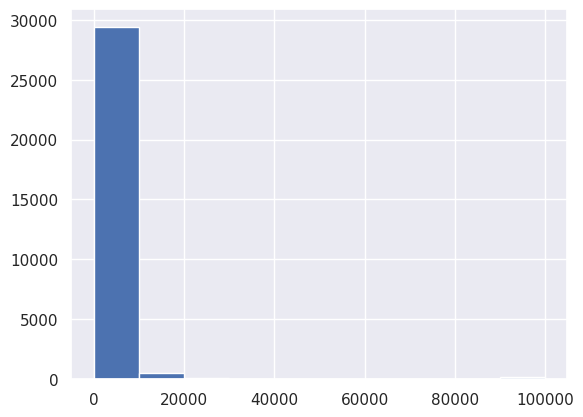

In [35]:
plt.hist(data2['capitalgain'])

In [36]:
data2['capitalgain'].value_counts()

0        27624
15024      337
7688       270
7298       240
99999      148
         ...  
1455         1
4931         1
22040        1
401          1
1086         1
Name: capitalgain, Length: 118, dtype: int64

In [37]:
27624/len(data2['capitalloss'])*100

91.58543863139049

(array([2.8744e+04, 1.7000e+01, 2.0000e+01, 4.2300e+02, 7.5100e+02,
        1.8900e+02, 1.1000e+01, 0.0000e+00, 6.0000e+00, 1.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <BarContainer object of 10 artists>)

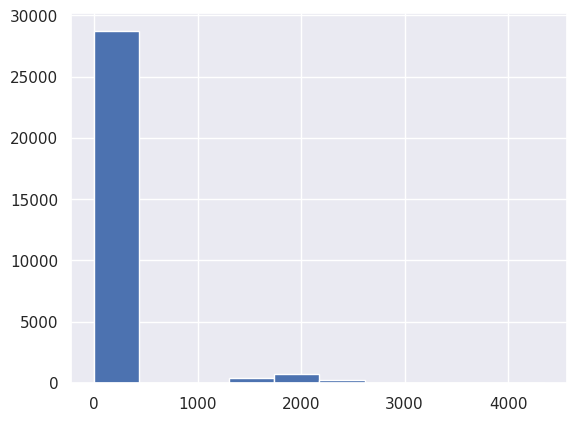

In [38]:
plt.hist(data2['capitalloss'])

In [39]:
data2['capitalloss'].value_counts()

0       28735
1902      194
1977      162
1887      155
1848       50
        ...  
2080        1
4356        1
1539        1
1844        1
1411        1
Name: capitalloss, Length: 90, dtype: int64

In [40]:
28735/len(data2['capitalloss'])*100

95.2688813739142

<Axes: xlabel='SalStat', ylabel='hoursperweek'>

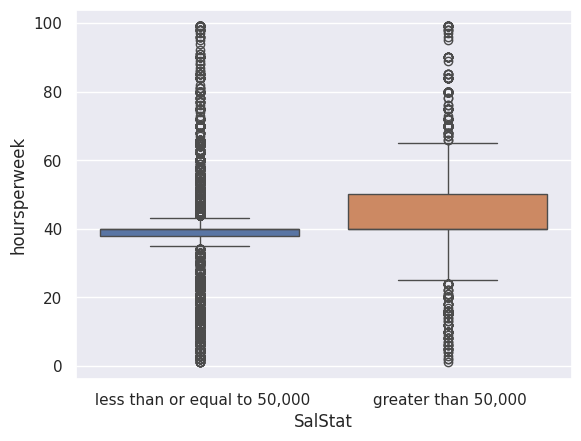

In [41]:
sns.boxplot(x='SalStat',y='hoursperweek',data=data2,hue='SalStat')

In [42]:
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

<ipython-input-42-e49b934c4542>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


In [43]:
data2.head(3)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1


In [44]:
new_data=pd.get_dummies(data2,drop_first=False)
print(new_data)

       age  capitalgain  capitalloss  hoursperweek  SalStat  \
0       45            0            0            28        0   
1       24            0            0            40        0   
2       44            0            0            40        1   
3       27            0            0            40        0   
4       20            0            0            35        0   
...    ...          ...          ...           ...      ...   
31973   34          594            0            60        0   
31974   34            0            0            40        0   
31975   23            0            0            40        0   
31976   42            0            0            40        0   
31977   29            0            0            40        0   

       JobType_ Federal-gov  JobType_ Local-gov  JobType_ Private  \
0                         0                   0                 1   
1                         1                   0                 0   
2                         0         

In [45]:
new_data['SalStat']

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

In [46]:
column_list=new_data.columns
print(column_list)

Index(['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat',
       'JobType_ Federal-gov', 'JobType_ Local-gov', 'JobType_ Private',
       'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc',
       ...
       'nativecountry_ Portugal', 'nativecountry_ Puerto-Rico',
       'nativecountry_ Scotland', 'nativecountry_ South',
       'nativecountry_ Taiwan', 'nativecountry_ Thailand',
       'nativecountry_ Trinadad&Tobago', 'nativecountry_ United-States',
       'nativecountry_ Vietnam', 'nativecountry_ Yugoslavia'],
      dtype='object', length=103)


In [47]:
features=list(set(column_list)-set(['SalStat']))
print(features)

['nativecountry_ Outlying-US(Guam-USVI-etc)', 'relationship_ Unmarried', 'nativecountry_ Nicaragua', 'EdType_ Assoc-voc', 'nativecountry_ Puerto-Rico', 'occupation_ Transport-moving', 'EdType_ 11th', 'nativecountry_ France', 'nativecountry_ Trinadad&Tobago', 'EdType_ 1st-4th', 'nativecountry_ Hungary', 'nativecountry_ Italy', 'race_ Asian-Pac-Islander', 'maritalstatus_ Married-spouse-absent', 'nativecountry_ Philippines', 'race_ White', 'nativecountry_ Taiwan', 'nativecountry_ England', 'maritalstatus_ Separated', 'occupation_ Other-service', 'EdType_ HS-grad', 'nativecountry_ Dominican-Republic', 'relationship_ Own-child', 'occupation_ Farming-fishing', 'JobType_ Local-gov', 'nativecountry_ India', 'nativecountry_ China', 'relationship_ Not-in-family', 'JobType_ Federal-gov', 'nativecountry_ Peru', 'nativecountry_ Thailand', 'EdType_ Some-college', 'JobType_ Without-pay', 'maritalstatus_ Married-AF-spouse', 'nativecountry_ Haiti', 'EdType_ Preschool', 'maritalstatus_ Divorced', 'occup

In [48]:
y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [49]:
x=new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [50]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [51]:
logistic=LogisticRegression()

In [52]:
logistic.fit(train_x,train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
logistic.coef_

array([[-1.02038254e-02, -5.34268274e-01, -1.70766507e-02,
        -3.93510470e-02, -5.79163564e-02, -3.02455310e-01,
        -4.06837088e-01,  6.98832843e-03, -5.34838402e-03,
        -1.04619528e-01, -4.74173242e-03, -8.65880883e-04,
        -1.67816028e-01, -6.72426254e-02, -4.81575123e-03,
        -3.57971629e-01,  8.65647497e-04,  1.93050969e-02,
        -2.07741264e-01, -8.76255485e-01, -8.84137013e-01,
        -3.32484545e-02, -1.02837972e+00, -5.55518919e-01,
        -3.16713052e-01, -3.63633959e-02, -3.59984661e-02,
        -3.87782553e-01,  1.35073806e-01, -1.55913975e-02,
        -4.05733819e-03, -4.14333976e-01, -1.02142518e-02,
         2.44449572e-02, -1.44678174e-02, -3.76593937e-02,
        -3.49523883e-01,  1.04000398e+00, -1.22955638e-03,
         7.09436126e-01, -1.16330657e-01, -6.56872946e-01,
        -3.69864407e-01,  3.37444562e-01, -3.96285241e-01,
        -1.06504540e-03,  7.46735338e-01, -3.92513936e-01,
        -5.60868985e-04, -1.03363159e-02, -4.69130948e-0

In [54]:
logistic.intercept_

array([-1.24134731])

In [55]:
prediction=logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [56]:
conf_matrix=confusion_matrix(test_y,prediction)
print(conf_matrix)

[[6256  567]
 [ 901 1325]]


In [57]:
print(conf_matrix[0][1]/test_y.shape[0]*100)
print(conf_matrix[1][0]/test_y.shape[0]*100)

6.26588573323019
9.956901315062437


In [58]:
accuracy=(conf_matrix[0][0]+conf_matrix[1][1])/np.sum(conf_matrix)
print(accuracy)
accu_score=accuracy_score(test_y,prediction)
print(accu_score)

0.8377721295170737
0.8377721295170737


In [59]:
print("Misclassified samples=%d" %(test_y!=prediction).sum())

Misclassified samples=1468


In [60]:
data2['SalStat']

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

In [61]:
cols=['gender','nativecountry','race','JobType']

In [62]:
new_data=data2.drop(cols,axis=1)
print(new_data)

       age         EdType        maritalstatus        occupation  \
0       45        HS-grad             Divorced      Adm-clerical   
1       24        HS-grad        Never-married      Armed-Forces   
2       44   Some-college   Married-civ-spouse    Prof-specialty   
3       27            9th        Never-married      Craft-repair   
4       20   Some-college        Never-married             Sales   
...    ...            ...                  ...               ...   
31973   34        HS-grad        Never-married   Farming-fishing   
31974   34   Some-college        Never-married   Protective-serv   
31975   23   Some-college   Married-civ-spouse      Adm-clerical   
31976   42   Some-college   Married-civ-spouse      Adm-clerical   
31977   29      Bachelors        Never-married    Prof-specialty   

          relationship  capitalgain  capitalloss  hoursperweek  SalStat  
0        Not-in-family            0            0            28        0  
1            Own-child            0

In [63]:
new_data=pd.get_dummies(new_data,drop_first=True)
print(new_data)

       age  capitalgain  capitalloss  hoursperweek  SalStat  EdType_ 11th  \
0       45            0            0            28        0             0   
1       24            0            0            40        0             0   
2       44            0            0            40        1             0   
3       27            0            0            40        0             0   
4       20            0            0            35        0             0   
...    ...          ...          ...           ...      ...           ...   
31973   34          594            0            60        0             0   
31974   34            0            0            40        0             0   
31975   23            0            0            40        0             0   
31976   42            0            0            40        0             0   
31977   29            0            0            40        0             0   

       EdType_ 12th  EdType_ 1st-4th  EdType_ 5th-6th  EdType_ 7th-8th  ...

In [64]:
column_list=list(new_data.columns)

In [65]:
features=list(set(column_list)-set(['SalStat']))
print(features)

['relationship_ Unmarried', 'EdType_ Assoc-voc', 'occupation_ Transport-moving', 'capitalgain', 'EdType_ 11th', 'EdType_ 1st-4th', 'age', 'hoursperweek', 'EdType_ 5th-6th', 'maritalstatus_ Married-spouse-absent', 'EdType_ 9th', 'occupation_ Priv-house-serv', 'EdType_ Masters', 'maritalstatus_ Separated', 'occupation_ Other-service', 'relationship_ Other-relative', 'EdType_ HS-grad', 'occupation_ Farming-fishing', 'relationship_ Own-child', 'maritalstatus_ Married-civ-spouse', 'EdType_ 12th', 'relationship_ Not-in-family', 'occupation_ Handlers-cleaners', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'occupation_ Sales', 'EdType_ Preschool', 'capitalloss', 'occupation_ Armed-Forces', 'occupation_ Exec-managerial', 'occupation_ Protective-serv', 'occupation_ Tech-support', 'maritalstatus_ Widowed', 'occupation_ Prof-specialty', 'EdType_ Bachelors', 'EdType_ Prof-school', 'maritalstatus_ Never-married', 'occupation_ Machine-op-inspct', 'EdType_ 7th-8th', 'EdType_ Assoc-acdm'

In [66]:
y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [69]:
x=new_data[features].values

In [70]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [71]:
logistic.fit(train_x,train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
logistic.coef_

array([[-6.40564179e-01, -8.55130928e-02, -2.13313748e-01,
         3.32100166e-04, -3.54555288e-01, -6.94963931e-02,
        -2.81602733e-03,  6.05639059e-03, -1.37294087e-01,
        -5.25499356e-02, -1.88131696e-01, -4.76439647e-02,
         5.79217153e-01, -1.94266666e-01, -8.20969797e-01,
        -2.64052379e-01, -1.05305319e+00, -3.12030266e-01,
        -1.07890287e+00,  1.00226228e+00, -1.04905977e-01,
        -5.23261188e-01, -4.01570977e-01, -5.00333655e-01,
         1.68682104e-02,  4.78707558e-02, -2.60864429e-02,
         5.65376126e-04, -1.50166538e-03,  9.02438515e-01,
         4.06560712e-02,  8.49745954e-02, -9.84706299e-02,
         7.14285481e-01,  6.39412318e-01,  2.73067401e-01,
        -1.53918655e+00, -4.51030308e-01, -2.53446113e-01,
        -8.69569811e-02,  2.82554389e-01, -3.79560813e-01,
         3.02374862e-02]])

In [73]:
logistic.intercept_

array([-1.40652591])

In [74]:
prediction=logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [75]:
conf_matrix=confusion_matrix(prediction,test_y)
print(conf_matrix)
accu_score=accuracy_score(prediction,test_y)
print(accu_score)

[[6291  974]
 [ 532 1252]]
0.8335727704718754


In [76]:
print("Misclassified samples=%d" %(prediction!=test_y).sum())

Misclassified samples=1506


In [79]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier=KNeighborsClassifier(n_neighbors=5)
KNN_classifier.fit(train_x,train_y)
prediction=KNN_classifier.predict(test_x)

In [81]:
conf_matrix=confusion_matrix(prediction,test_y)
print(conf_matrix)
accu_score=accuracy_score(prediction,test_y)
print(accu_score)
print("Misclassified samples=%d" %(prediction!=test_y).sum())

[[6188  855]
 [ 635 1371]]
0.835340921648801
Misclassified samples=1490


In [83]:
Misclassified_samples=[]
for i in range(1,20):
  KNN_classifier=KNeighborsClassifier(n_neighbors=i)
  KNN_classifier.fit(train_x,train_y)
  predict_i=KNN_classifier.predict(test_x)
  Misclassified_samples.append((predict_i!=test_y).sum())

In [87]:
print(Misclassified_samples)

[1723, 1512, 1541, 1480, 1490, 1442, 1467, 1433, 1437, 1416, 1413, 1434, 1437, 1445, 1426, 1420, 1438, 1423, 1441]
